In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data.csv')
df.head()

,LotFrontage,PoolQC,TotalBsmtSF,GrLivArea,LotArea,SaleCondition,GarageType,SalePrice
0,65.0,NaN,856,1710,8450,Normal,Attchd,208500
1,80.0,NaN,1262,1262,9600,Normal,Attchd,181500
2,68.0,NaN,920,1786,11250,Normal,Attchd,223500
3,60.0,NaN,756,1717,9550,Abnorml,Detchd,140000
4,84.0,NaN,1145,2198,14260,Normal,Attchd,250000


In [5]:
X = df.iloc[:,:7]
X.head()

,LotFrontage,PoolQC,TotalBsmtSF,GrLivArea,LotArea,SaleCondition,GarageType
0,65.0,NaN,856,1710,8450,Normal,Attchd
1,80.0,NaN,1262,1262,9600,Normal,Attchd
2,68.0,NaN,920,1786,11250,Normal,Attchd
3,60.0,NaN,756,1717,9550,Abnorml,Detchd
4,84.0,NaN,1145,2198,14260,Normal,Attchd


In [6]:
y = df[['SalePrice']]
y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
X_train

,LotFrontage,PoolQC,TotalBsmtSF,GrLivArea,LotArea,SaleCondition,GarageType
455,80.0,NaN,1242,1242,9600,Normal,Attchd
863,70.0,NaN,1148,1148,7931,Normal,Attchd
504,24.0,NaN,855,1322,2308,Normal,Attchd
1413,88.0,NaN,1844,1844,10994,Abnorml,Attchd
1389,60.0,NaN,735,1218,6000,Normal,Detchd
...,...,...,...,...,...,...,...
466,85.0,NaN,1277,1277,10628,Normal,Attchd
299,80.0,NaN,1092,1152,14000,Family,Attchd
493,70.0,NaN,1269,1269,7931,Normal,Detchd
527,67.0,NaN,1452,2713,14948,Partial,Attchd


In [9]:
X_test

,LotFrontage,PoolQC,TotalBsmtSF,GrLivArea,LotArea,SaleCondition,GarageType
503,100.0,NaN,1501,1801,15602,Normal,Attchd
101,77.0,NaN,741,1732,9206,Normal,Attchd
608,78.0,NaN,965,3194,12168,Alloca,Basment
1089,37.0,NaN,1247,1247,3316,Normal,Attchd
819,44.0,NaN,1358,1358,6371,Partial,Attchd
...,...,...,...,...,...,...,...
816,NaN,NaN,1008,1008,11425,Normal,Attchd
1273,124.0,NaN,1019,1357,11512,Normal,Basment
285,35.0,NaN,625,1250,4251,Partial,Detchd
194,60.0,NaN,864,864,7180,Normal,Detchd


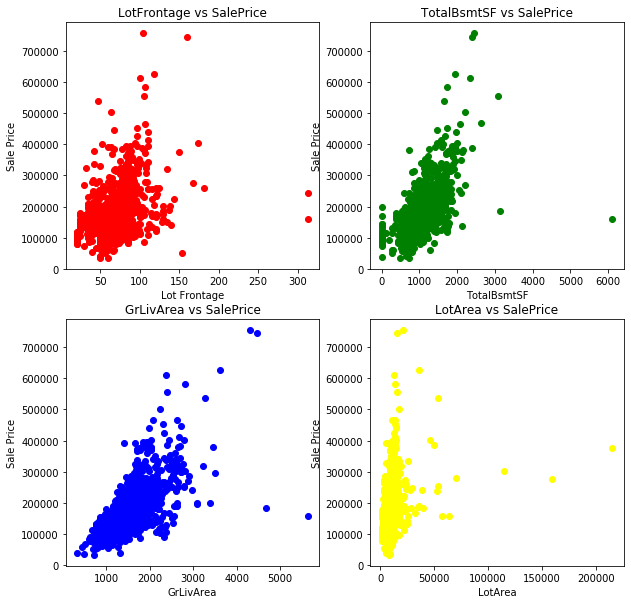

In [18]:
#Outlier detection

fig, ((ax_1, ax_2), (ax_3, ax_4)) = plt.subplots(2,2, figsize=(10,10))

ax_1.scatter(X_train['LotFrontage'], y_train, color='red')
ax_1.set_xlabel('Lot Frontage')
ax_1.set_ylabel('Sale Price')
ax_1.set_title('LotFrontage vs SalePrice')

ax_2.scatter(X_train['TotalBsmtSF'], y_train, color='green')
ax_2.set_xlabel('TotalBsmtSF')
ax_2.set_ylabel('Sale Price')
ax_2.set_title('TotalBsmtSF vs SalePrice')

ax_3.scatter(X_train['GrLivArea'], y_train, color='blue')
ax_3.set_xlabel('GrLivArea')
ax_3.set_ylabel('Sale Price')
ax_3.set_title('GrLivArea vs SalePrice')

ax_4.scatter(X_train['LotArea'], y_train, color='yellow')
ax_4.set_xlabel('LotArea')
ax_4.set_ylabel('Sale Price')
ax_4.set_title('LotArea vs SalePrice')

plt.show()

In [19]:
#Treating outliers
#We concat features and target to delete the outlier instances can be deleted for both at the same time
train = pd.concat([X_train, y_train], axis=1)
train

,LotFrontage,PoolQC,TotalBsmtSF,GrLivArea,LotArea,SaleCondition,GarageType,SalePrice
455,80.0,NaN,1242,1242,9600,Normal,Attchd,175500
863,70.0,NaN,1148,1148,7931,Normal,Attchd,132500
504,24.0,NaN,855,1322,2308,Normal,Attchd,147000
1413,88.0,NaN,1844,1844,10994,Abnorml,Attchd,257000
1389,60.0,NaN,735,1218,6000,Normal,Detchd,131000
...,...,...,...,...,...,...,...,...
466,85.0,NaN,1277,1277,10628,Normal,Attchd,167000
299,80.0,NaN,1092,1152,14000,Family,Attchd,158500
493,70.0,NaN,1269,1269,7931,Normal,Detchd,155000
527,67.0,NaN,1452,2713,14948,Partial,Attchd,446261


In [20]:
mask1 = df['LotFrontage']<300
mask2 = train['TotalBsmtSF']<5000
mask3 = train['GrLivArea']<4500
mask4 = train['LotArea']<100000

train = train[mask1 & mask2 & mask3 & mask4]
print(train)

      LotFrontage PoolQC  TotalBsmtSF  GrLivArea  LotArea SaleCondition  \
455          80.0    NaN         1242       1242     9600        Normal   
863          70.0    NaN         1148       1148     7931        Normal   
504          24.0    NaN          855       1322     2308        Normal   
1413         88.0    NaN         1844       1844    10994       Abnorml   
1389         60.0    NaN          735       1218     6000        Normal   
...           ...    ...          ...        ...      ...           ...   
466          85.0    NaN         1277       1277    10628        Normal   
299          80.0    NaN         1092       1152    14000        Family   
493          70.0    NaN         1269       1269     7931        Normal   
527          67.0    NaN         1452       2713    14948       Partial   
1192         60.0    NaN          702       1472     9600        Normal   

     GarageType  SalePrice  
455      Attchd     175500  
863      Attchd     132500  
504      Att

C:\Users\Mrunal\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
LotFrontage      1201 non-null float64
PoolQC           7 non-null object
TotalBsmtSF      1460 non-null int64
GrLivArea        1460 non-null int64
LotArea          1460 non-null int64
SaleCondition    1460 non-null object
GarageType       1379 non-null object
SalePrice        1460 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 91.4+ KB


In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 455 to 1192
Data columns (total 7 columns):
LotFrontage      967 non-null float64
PoolQC           5 non-null object
TotalBsmtSF      1168 non-null int64
GrLivArea        1168 non-null int64
LotArea          1168 non-null int64
SaleCondition    1168 non-null object
GarageType       1103 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 113.0+ KB


In [23]:
X_train.isnull().sum()

LotFrontage       201
PoolQC           1163
TotalBsmtSF         0
GrLivArea           0
LotArea             0
SaleCondition       0
GarageType         65
dtype: int64

In [24]:
#Detecting missing values

X_train1, y_train1 = train.iloc[:,:7], train[['SalePrice']]

In [25]:
#percentage of missing values
missing_columns = (X_train1.isnull().sum() * 100)/len(X_train1)
missing_columns

#OR USE:
#for column in train.columns:
    #print("Percentage of missing values in {} is: {}".format(column, (train[column].isnull().sum()*100)/len(train)))

LotFrontage       0.000000
PoolQC           99.584631
TotalBsmtSF       0.000000
GrLivArea         0.000000
LotArea           0.000000
SaleCondition     0.000000
GarageType        6.334372
dtype: float64

In [26]:
#missing values above 50 percent

mask = missing_columns>50
missing_columns[mask]

PoolQC    99.584631
dtype: float64

In [27]:
#columns with missing values

columns = missing_columns[mask].index.tolist()
print(columns)

['PoolQC']


In [28]:
#Percentage of rows with more than 5 missing entries

rows_percentage = (1 - (len(X_train.dropna(thresh=5)) / len(X_train)))*100
rows_percentage

0.3424657534246589

In [31]:
#Treating missing values

from sklearn.impute import SimpleImputer as Imputer

X_train = X_train.drop('PoolQC',axis=1)
X_test = X_test.drop('PoolQC',axis=1)

In [48]:
#Initiating mean and mode imputing strategies

mean_imp = Imputer(missing_values='NaN', strategy='mean')

In [49]:
mode_imp = Imputer(strategy='most_frequent')

In [50]:
#Fitting mode imputer on TRAINING DATA ONLY

mode_imp.fit(X_train[['GarageType']])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [56]:
#Transforming BOTH TRAIN AND TEST DATA using mode imputer

X_train['GarageType'] = mode_imp.transform(X_train[['GarageType']])

In [57]:
X_test['GarageType'] = mode_imp.transform(X_test[['GarageType']])

In [58]:
X_train.isnull().sum()

LotFrontage      201
TotalBsmtSF        0
GrLivArea          0
LotArea            0
SaleCondition      0
GarageType         0
dtype: int64

In [61]:
#Fitting mode imputer on TRAINING DATA ONLY

mode_imp.fit(X_train[['LotFrontage']])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [62]:
#Transforming BOTH TRAIN AND TEST DATA using mode imputer

X_train['LotFrontage'] = mode_imp.transform(X_train[['LotFrontage']])
X_test['LotFrontage'] = mode_imp.transform(X_test[['LotFrontage']])

In [65]:
print(X_train.isnull().sum())

LotFrontage      0
TotalBsmtSF      0
GrLivArea        0
LotArea          0
SaleCondition    0
GarageType       0
dtype: int64


In [66]:
print(X_test.isnull().sum())

LotFrontage      0
TotalBsmtSF      0
GrLivArea        0
LotArea          0
SaleCondition    0
GarageType       0
dtype: int64


In [68]:
import seaborn as sns

y_train = np.log(y_train)

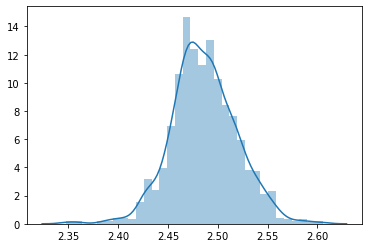

In [69]:
sns.distplot(y_train)
plt.show()

#Gives approximately normal distribution

In [71]:
#Standardization

from sklearn.preprocessing import MinMaxScaler

num_columns = ['LotFrontage', 'TotalBsmtSF', 'GrLivArea', 'LotArea']

normalizer = MinMaxScaler()
normalizer.fit(X_train[num_columns])

X_train[num_columns] = normalizer.transform(X_train[num_columns])
X_test[num_columns] = normalizer.transform(X_test[num_columns])

In [72]:
X_train.head()

,LotFrontage,TotalBsmtSF,GrLivArea,LotArea,SaleCondition,GarageType
455,0.202055,0.203273,0.171063,0.037999,Normal,Attchd
863,0.167808,0.187889,0.153353,0.030192,Normal,Attchd
504,0.010274,0.139935,0.186134,0.003887,Normal,Attchd
1413,0.229452,0.301800,0.284476,0.044520,Abnorml,Attchd
1389,0.133562,0.120295,0.166541,0.021158,Normal,Detchd


In [73]:
X_test.head()

,LotFrontage,TotalBsmtSF,GrLivArea,LotArea,SaleCondition,GarageType
503,0.270548,0.245663,0.276375,0.066076,Normal,Attchd
101,0.191781,0.121277,0.263376,0.036156,Normal,Attchd
608,0.195205,0.157938,0.538809,0.050012,Alloca,Basment
1089,0.054795,0.204092,0.172005,0.008603,Normal,Attchd
819,0.078767,0.222259,0.192916,0.022894,Partial,Attchd


In [80]:
#Label encoding for categorical variables

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

X_train['SaleCondition'] = encoder.fit_transform(X_train['SaleCondition'])
X_test['SaleCondition'] = encoder.fit_transform(X_test['SaleCondition'])

In [81]:
X_train.head()

,LotFrontage,TotalBsmtSF,GrLivArea,LotArea,SaleCondition,GarageType
455,0.202055,0.203273,0.171063,0.037999,4,Attchd
863,0.167808,0.187889,0.153353,0.030192,4,Attchd
504,0.010274,0.139935,0.186134,0.003887,4,Attchd
1413,0.229452,0.301800,0.284476,0.044520,0,Attchd
1389,0.133562,0.120295,0.166541,0.021158,4,Detchd


In [82]:
X_test.head()

,LotFrontage,TotalBsmtSF,GrLivArea,LotArea,SaleCondition,GarageType
503,0.270548,0.245663,0.276375,0.066076,3,Attchd
101,0.191781,0.121277,0.263376,0.036156,3,Attchd
608,0.195205,0.157938,0.538809,0.050012,1,Basment
1089,0.054795,0.204092,0.172005,0.008603,3,Attchd
819,0.078767,0.222259,0.192916,0.022894,4,Attchd


In [87]:
#One hot encoding for categorical variables

x_train = pd.get_dummies(X_train['GarageType'])
x_train.head()
x_test = pd.get_dummies(X_test['GarageType'])
x_test.head()

,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd
503,0,1,0,0,0,0
101,0,1,0,0,0,0
608,0,0,1,0,0,0
1089,0,1,0,0,0,0
819,0,1,0,0,0,0
